# 目的
- チョコボール数検出のモデルのテスト

In [1]:
import matplotlib.pyplot as plt

import os
import glob
import numpy as np
from PIL import Image

from chainercv.utils import read_image
from chainercv.visualizations import vis_bbox
from chainercv.links import FasterRCNNVGG16

/home/tokita/.pyenv/versions/anaconda2-4.4.0/envs/py3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def getClasses(classes_file):
    # カテゴリファイル
    classes = list()
    with open(classes_file) as fd:
        for one_line in fd.readlines():
            cl = one_line.split('\n')[0]
            classes.append(cl)
    return classes

In [3]:
HOME = '/home/tokita/workspace/etc/choco-ball-statistics/analysis/ChocoBallDetector'

# データロード

## 画像データのロード

In [4]:
data_dir = os.path.join(HOME, 'data/res_images')
img_files = glob.glob(os.path.join(data_dir, '*.JPG'))
print(len(img_files))

145


In [5]:
img_list = list()
for img_file in img_files:
    img = Image.open(img_file)
    img_arr = np.asarray(img).transpose(2,0,1).astype(np.float32) # Chainer入力用にarrayを変換
    img_list.append(img_arr)
    #print(img_arr.shape)


## クラスラベル

In [6]:
file_classes = os.path.join(HOME, 'data/classes.txt')
classes = getClasses(file_classes)
print(classes)

['choco-ball', 'choco-package']


## モデルファイルのセット

In [7]:
pretrain_model = 'out/snapshot_model.npz' # 独自で学習させたモデル

model_frcnn = FasterRCNNVGG16(n_fg_class=len(classes),
                              pretrained_model=pretrain_model)

# 物体検出

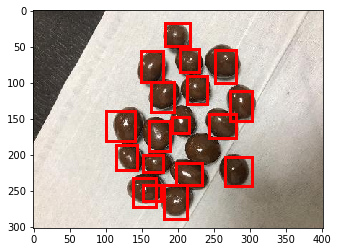

In [8]:
bboxes, labels, scores = model_frcnn.predict([img_list[0]])
vis_bbox(img_list[0], bboxes[0], labels[0])
#vis_bbox(img_list[0], bboxes[0], labels[0], scores[0], label_names=classes)
plt.show()